In [130]:
from sklearn import svm,datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time
from sklearn.preprocessing import StandardScaler

In [7]:
oliv = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Mansi Gupta\scikit_learn_data


In [9]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [49]:
oliv.images.shape

(400, 64, 64)

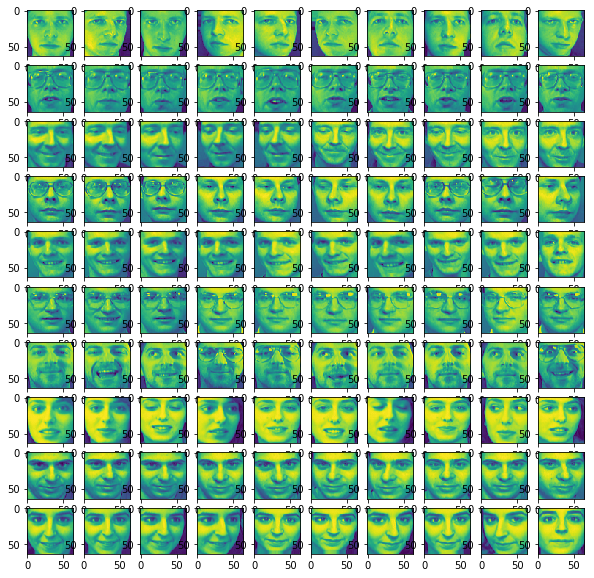

In [25]:
fig = plt.figure(figsize=(10,10))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(oliv.images[i])
plt.show()

In [131]:
x = oliv.data
y = oliv.target
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_train , x_test, y_train , y_test = train_test_split(x_std,y, random_state=1)
x_train, x_train_val, y_train, y_train_val = train_test_split(x_train, y_train, random_state=1)

In [133]:
pca = PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [134]:
x_train.shape

(225, 4096)

In [135]:
k=0
total = 0
while(total<0.97):
    total += pca.explained_variance_ratio_[k]
    k= k+1
k

118

In [136]:
pca_oliv = PCA(n_components=k, whiten= True)
x_transformed = pca_oliv.fit_transform(x_train)
x_transformed.shape

(225, 118)

In [137]:
x_train_pca = x_transformed

In [138]:
x_train_val_pca = pca_oliv.transform(x_train_val)

Random forest

In [139]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train, y_train)
end = time.time()
y_pred = rf.predict(x_train_val)
print(end-start)
print(classification_report(y_train_val,y_pred))

0.6000328063964844
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       1.00      0.33      0.50         3
          2       0.00      0.00      0.00         3
          3       0.50      0.67      0.57         3
          4       0.50      1.00      0.67         3
          5       1.00      1.00      1.00         1
          6       0.67      1.00      0.80         2
          7       0.67      1.00      0.80         2
          8       0.00      0.00      0.00         2
          9       0.50      0.50      0.50         2
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         1
         12       0.33      1.00      0.50         1
         13       0.33      1.00      0.50         1
         14       0.00      0.00      0.00         1
         15       1.00      1.00      1.00         1
         16       0.50      1.00      0.67         1
         17       1.00    

F:\python1\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\python1\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [140]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca, y_train)
end = time.time()
y_pred = rf.predict(x_train_val_pca)
print(end-start)
print(classification_report(y_train_val,y_pred))

0.17202973365783691
             precision    recall  f1-score   support

          0       0.25      1.00      0.40         1
          1       1.00      0.67      0.80         3
          2       0.33      0.33      0.33         3
          3       0.33      0.33      0.33         3
          4       0.33      0.33      0.33         3
          5       0.00      0.00      0.00         1
          6       0.00      0.00      0.00         2
          7       0.40      1.00      0.57         2
          8       1.00      0.50      0.67         2
          9       0.00      0.00      0.00         2
         10       1.00      0.50      0.67         2
         11       0.33      1.00      0.50         1
         12       0.00      0.00      0.00         1
         13       1.00      1.00      1.00         1
         14       0.50      1.00      0.67         1
         15       0.50      1.00      0.67         1
         16       0.50      1.00      0.67         1
         17       0.00   

F:\python1\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\python1\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


SVM

In [141]:
clf = svm.SVC(kernel = 'linear')
start = time.time()
clf.fit(x_train, y_train)
end = time.time()

In [142]:
print(clf.score(x_train_val, y_train_val))
print(end-start)

0.866666666667
0.8879992961883545


In [143]:
start = time.time()
clf.fit(x_train_pca, y_train)
end = time.time()

In [144]:
print(clf.score(x_train_val_pca, y_train_val))
print(end-start)

0.853333333333
0.09994983673095703


Naive Bayes

In [145]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
start = time.time()
clf.fit(x_train, y_train)
print(time.time()-start)
y_pred = clf.predict(x_train_val)
print(classification_report(y_train_val,y_pred))

0.11599230766296387
             precision    recall  f1-score   support

          0       0.33      1.00      0.50         1
          1       0.00      0.00      0.00         3
          2       0.00      0.00      0.00         3
          3       0.21      1.00      0.35         3
          4       0.75      1.00      0.86         3
          5       1.00      1.00      1.00         1
          6       1.00      0.50      0.67         2
          7       1.00      1.00      1.00         2
          8       0.00      0.00      0.00         2
          9       1.00      0.50      0.67         2
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         1
         12       0.00      0.00      0.00         1
         13       0.00      0.00      0.00         1
         14       1.00      1.00      1.00         1
         15       0.25      1.00      0.40         1
         16       0.17      1.00      0.29         1
         17       0.00   

F:\python1\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [146]:
start = time.time()
clf.fit(x_train_pca, y_train)
print(time.time()-start)
y_pred = clf.predict(x_train_val_pca)
print(classification_report(y_train_val,y_pred))

0.007997751235961914
             precision    recall  f1-score   support

          0       0.14      1.00      0.25         1
          1       0.00      0.00      0.00         3
          2       0.00      0.00      0.00         3
          3       0.43      1.00      0.60         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         1
          6       0.00      0.00      0.00         2
          7       0.29      1.00      0.44         2
          8       0.00      0.00      0.00         2
          9       0.00      0.00      0.00         2
         10       1.00      1.00      1.00         2
         11       0.25      1.00      0.40         1
         12       0.00      0.00      0.00         1
         13       0.00      0.00      0.00         1
         14       1.00      1.00      1.00         1
         15       0.11      1.00      0.20         1
         16       0.25      1.00      0.40         1
         17       0.00  

F:\python1\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Test Score Evaluation Using SVM

In [148]:
clf = svm.SVC(kernel = 'linear')
x_test_pca = pca_oliv.transform(x_test)
start = time.time()
clf.fit(x_train_pca, y_train)
end = time.time()

In [150]:
print(clf.score(x_test_pca, y_test))
print(end-start)

0.86
0.04399561882019043
